In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import files
from tensorflow.keras.models import load_model

In [ ]:
train_dir = '/content/drive/MyDrive/dataset_rekanikan_lengkap_aug_version_v2/train'
validation_dir = '/content/drive/MyDrive/dataset_rekanikan_lengkap_aug_version_v2/validation'

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=36,
    class_mode='sparse'
)

Found 2688 images belonging to 4 classes.


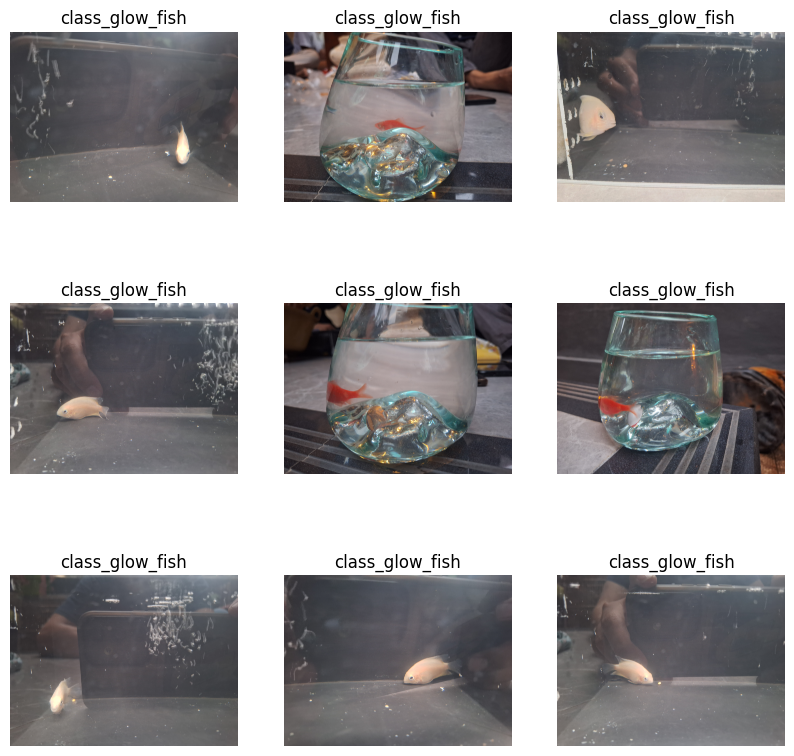

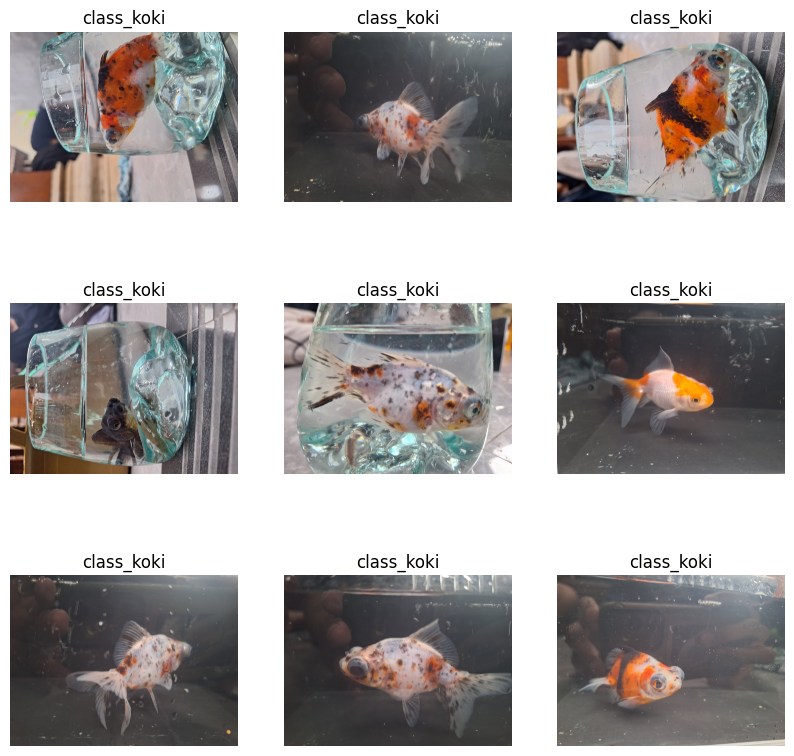

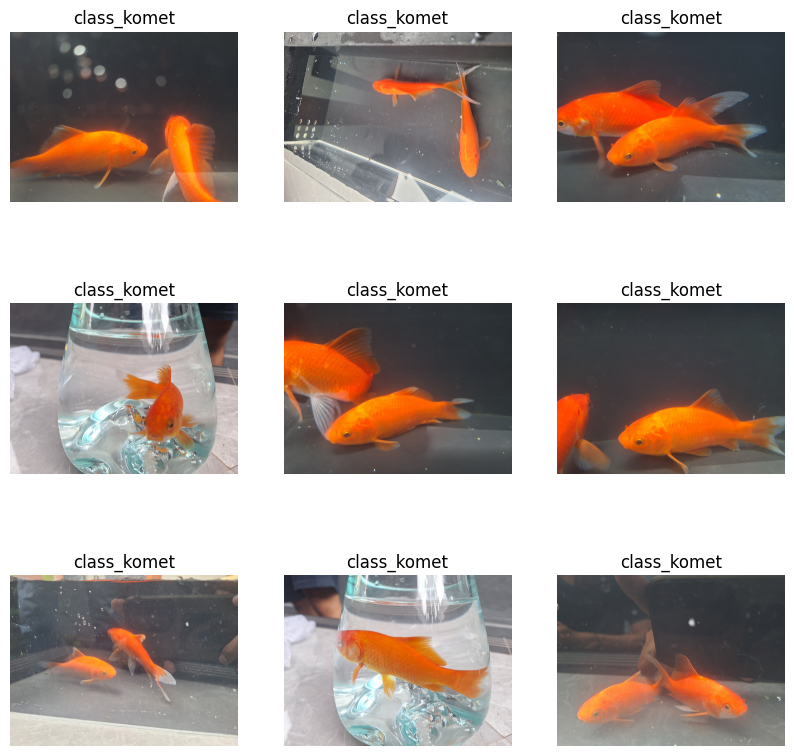

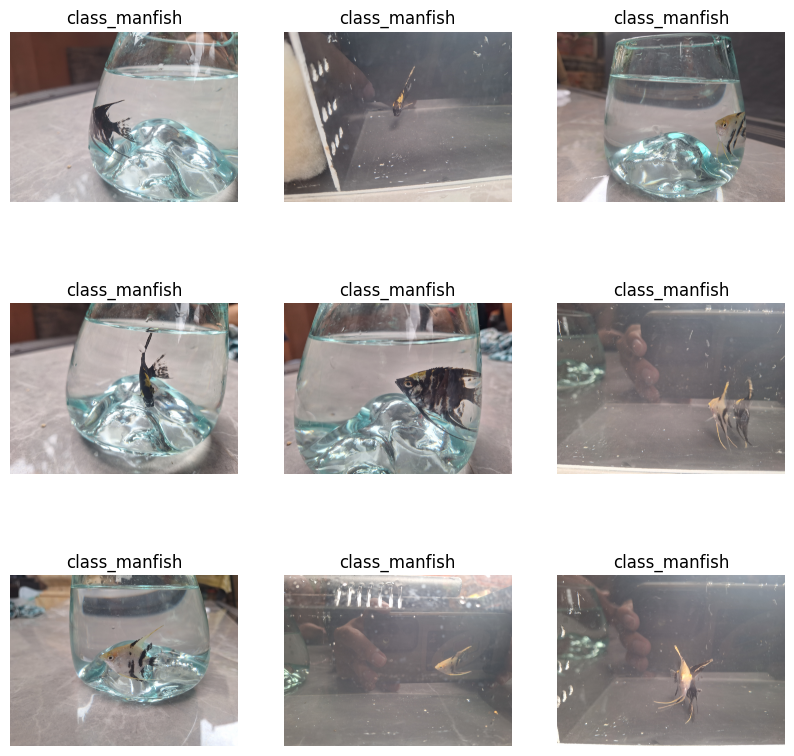

In [ ]:
class_names = list(train_generator.class_indices.keys())
dataset_path = '/content/drive/MyDrive/dataset_rekanikan_lengkap'

# Tampilkan gambar grid 3x3 untuk setiap kelas pada set pelatihan
for class_name in class_names:
    # Ambil beberapa sampel gambar dari setiap kelas
    class_samples = os.listdir(os.path.join(dataset_path, "train", class_name))[:9]

    # Plot gambar grid 3x3
    plt.figure(figsize=(10, 10))
    for i in range(len(class_samples)):
        plt.subplot(3, 3, i+1)
        img_path = os.path.join(dataset_path, "train", class_name, class_samples[i])
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

In [ ]:
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=36,
    class_mode='sparse'
)

Found 756 images belonging to 4 classes.


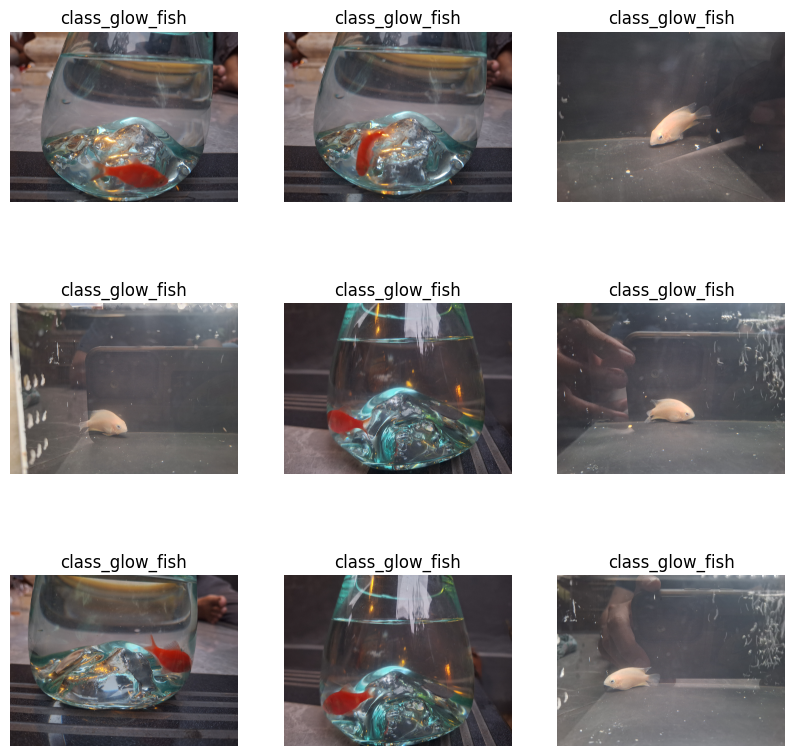

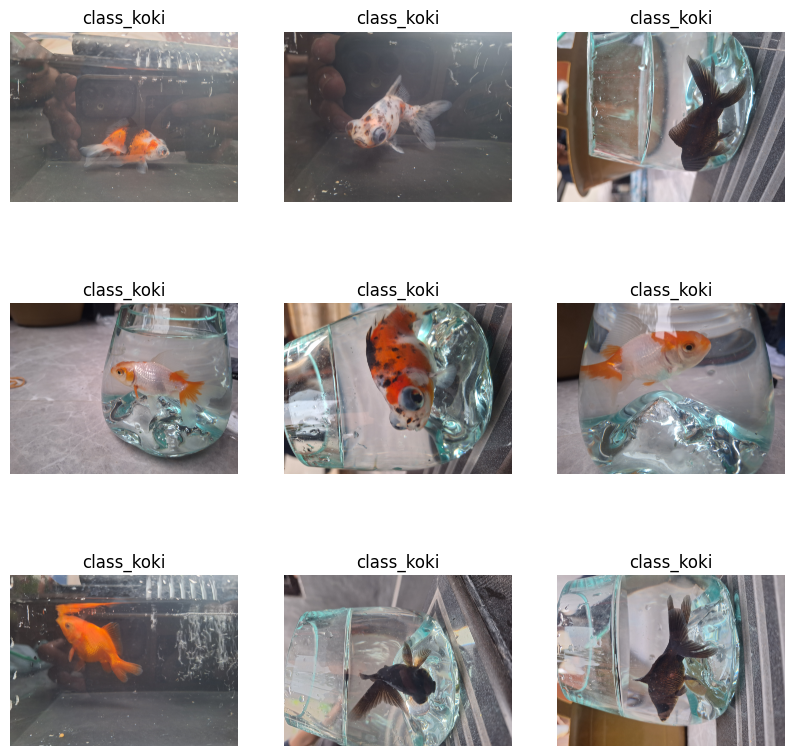

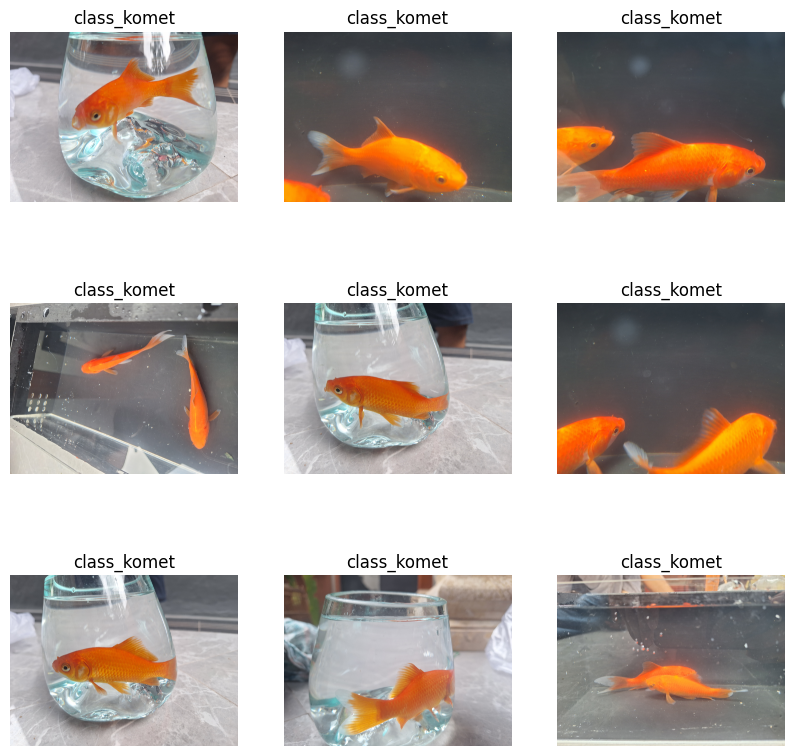

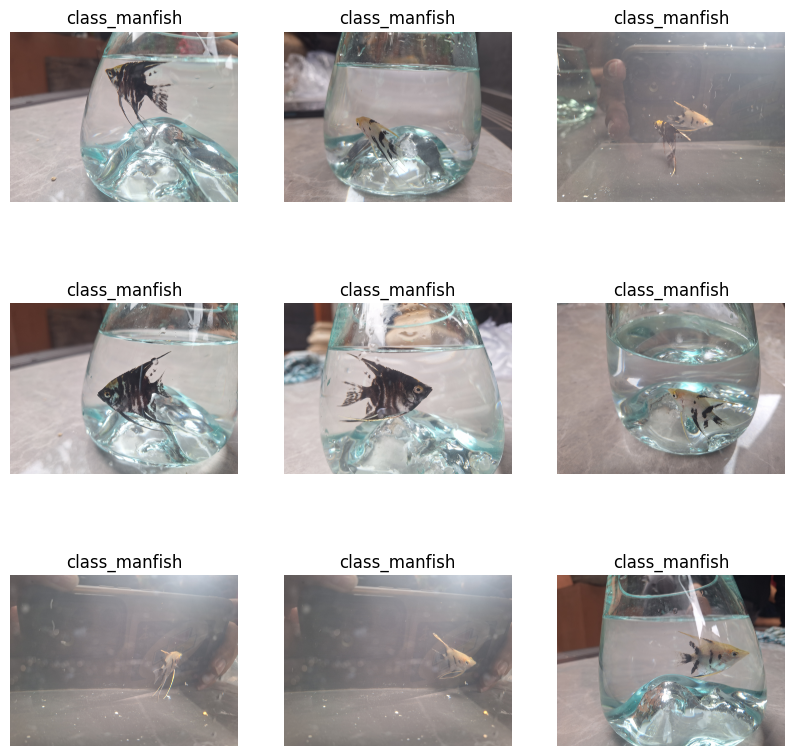

In [ ]:
for class_name in class_names:
    # Ambil beberapa sampel gambar dari setiap kelas
    class_samples = os.listdir(os.path.join(dataset_path, "validation", class_name))[:9]

    # Plot gambar grid 3x3
    plt.figure(figsize=(10, 10))
    for i in range(len(class_samples)):
        plt.subplot(3, 3, i+1)
        img_path = os.path.join(dataset_path, "validation", class_name, class_samples[i])
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(12, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(36, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(144, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(576, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 12)      336       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 70, 70, 36)        10836     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 35, 35, 36)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 33, 33, 144)       46800     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 144)      

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch= 2688  // 36, # jumlah gambar dalam set pelatihan / batch_size
    epochs=20,
    validation_data=validation_generator,
    validation_steps= 756 // 36 # jumlah gambar dalam set validasi / batch_size
)

Epoch 1/20
74/74 [==============================] - 969s 13s/step - loss: 0.8640 - accuracy: 0.6218 - val_loss: 0.5791 - val_accuracy: 0.7579
Epoch 2/20
74/74 [==============================] - 283s 4s/step - loss: 0.5428 - accuracy: 0.7760 - val_loss: 0.5230 - val_accuracy: 0.7937
Epoch 3/20
74/74 [==============================] - 285s 4s/step - loss: 0.4244 - accuracy: 0.8269 - val_loss: 0.6830 - val_accuracy: 0.7063
Epoch 4/20
74/74 [==============================] - 281s 4s/step - loss: 0.4245 - accuracy: 0.8330 - val_loss: 0.6393 - val_accuracy: 0.7976
Epoch 5/20
74/74 [==============================] - 286s 4s/step - loss: 0.3540 - accuracy: 0.8635 - val_loss: 0.4045 - val_accuracy: 0.8439
Epoch 6/20
74/74 [==============================] - 287s 4s/step - loss: 0.2906 - accuracy: 0.8855 - val_loss: 0.4210 - val_accuracy: 0.8413
Epoch 7/20
74/74 [==============================] - 274s 4s/step - loss: 0.2323 - accuracy: 0.9125 - val_loss: 0.3086 - val_accuracy: 0.8770
Epoch 8/20
7

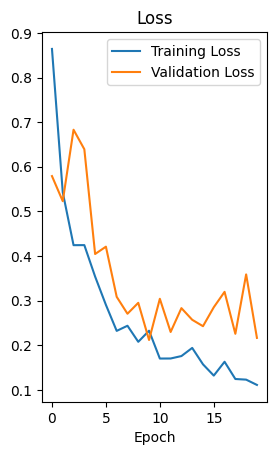

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

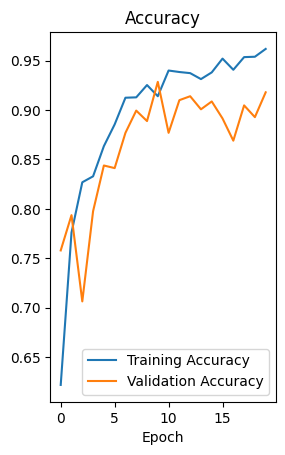

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
eval_result = model.evaluate(validation_generator, steps= 756 // 36)

# Cetak hasil evaluasi
print("Loss:", eval_result[0])
print("Accuracy:", eval_result[1])

21/21 [==============================] - 57s 3s/step - loss: 0.2387 - accuracy: 0.9061
Loss: 0.23874498903751373
Accuracy: 0.9060846567153931


In [ ]:
new_model = load_model('/content/drive/MyDrive/model_machine_learning/model_90_23_good.h5')
evaluation_result = new_model.evaluate(validation_generator, steps= 756 // 36 )

# Output hasil evaluasi
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])

21/21 [==============================] - 61s 3s/step - loss: 0.2627 - accuracy: 0.9074
Loss: 0.26270779967308044
Accuracy: 0.9074074029922485


In [ ]:
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
uploaded = files.upload()

# Mendapatkan path dari file yang diunggah
file_path = list(uploaded.keys())[0]

# Load gambar dan sesuaikan ukurannya dengan target_size yang digunakan saat pelatihan
img = image.load_img(file_path, target_size=(150, 150))

# Konversi gambar menjadi array numpy dan lakukan normalisasi
img_array = image.img_to_array(img) / 255.0

# Tambahkan dimensi batch (karena model menerima input dalam bentuk batch)
img_array = np.expand_dims(img_array, axis=0)

# Lakukan prediksi
prediction = model.predict(img_array)

# Ambil kelas dengan probabilitas tertinggi sebagai hasil prediksi
predicted_class = np.argmax(prediction)

# Tampilkan hasil prediksi
# print(f'Prediksi: Kelas {predicted_class}')

# Tampilkan nama direktori berdasarkan indeks kelas
class_directories = {0: 'class_glow_fish', 1: 'class_koki', 2: 'class_Komet', 3: 'class_manfish'}

class_name = class_directories.get(predicted_class, 'Kelas tidak dikenal')

print(f'Hasil Prediksi : {class_name}')

Saving 61.jpg to 61.jpg
1/1 [==============================] - 0s 18ms/step
Hasil Prediksi : class_koki


In [ ]:
save_directory = '/content/drive/MyDrive/model_machine_learning/'
model.save(save_directory + 'model_90_23_good.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
